# SC-VAR Usage

single cell Multi Omics data

We display the pipline of SC-VAR using multi omics data (ATAC+RNA)

Check the workflow in README.md for details.

For single cell multi omics data, we assign noncoding SNPs to their target genes based on peak to gene linkage of Signac.



In [ ]:
!pip install sc-var

In [3]:
import scdrs
import scanpy as sc
import episcanpy as epi
from anndata import AnnData
from anndata import read_h5ad
from scipy import stats
import pandas as pd
import numpy as np
import sc_var
from sc_var import method as scv
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import axes
import pylab
from matplotlib.pyplot import rc_context
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl

from cycler import cycler

warnings.filterwarnings("ignore")


## preprocessing data

We provide a multi_omics_p2g() function for directly modified the output file from signac LinkPeaks() function.

In [4]:
#GWAS data
snp_list=scv.read_gwas('~/data/SCZ.txt')

In [6]:
#peak data (  )
peak_list=scv.multi_omics_p2g('~/data/signac_multi_links_data.csv')

The annotation, gene analysis, and the geneset enrichment analysis steps are the same as scATAC-seq tutorial

In [8]:
#overlp SNPs and peaks 
overlap_matrix = scv.snp_peak(peak_list,snp_list)

## Cell Scoring



There are two branches: 

1. Use the c-magma risk geneset and RNA-seq data 

2. Use the risk peaks set and atac-seq data 

(Noted The peak is not totally the same as we used in scATAC-seq tutorial because of the p2g strategy, but it should be the subset of the co-accessibility risk peaks set)

____________________________________________________________________________________________________________________

1. Cell type risks associated with expression status

In [ ]:
#load scRNA-seq data
adata = sc.read_h5ad('~/rna.h5ad')

In [ ]:
#calculate  disease for each cells
#Take time to run 
df_score=scv.scads_rna(adata,'~/data/multi_branch1.gs')

In [ ]:
#statistical analysis 
df_group=scv.stat_analysis(
    adata=adata,
    df_full_score=df_score["SCZ"],
    group_cols=["celltype"])

for key, df in df_group.items():
    #add key to filename
    df.to_csv(f"{key}_scv_group.celltype", sep="\t", index_col=0)

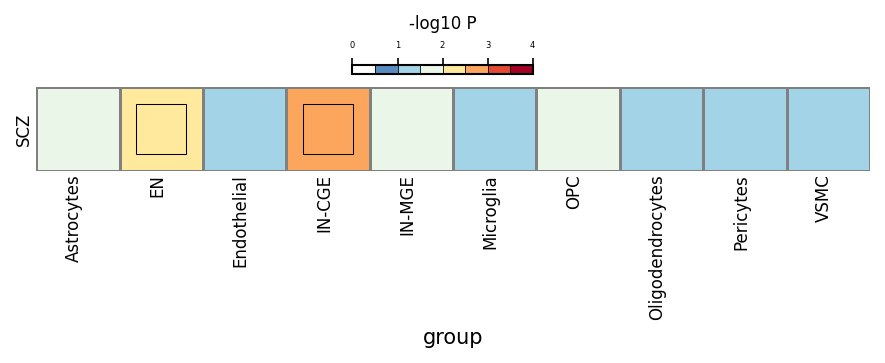

In [16]:
dict_branch1_stats = {
    'SCZ': pd.read_csv(f"~/SCZ.scv_group.celltype", sep="\t", index_col=0)
}
scv.plot_group_stats(dict_branch1_stats)

2. Cell type risks associated with chromatin accessibility status

In [ ]:
#load scATAC-seq data
adata = sc.read_h5ad('~/atac.h5ad')

In [ ]:
#calculate  disease for each cells
#Take time to run 
df_score=scv.scads_rna(adata,'~/data/multi_branch2.gs')

In [ ]:
#statistical analysis 
df_group=scv.stat_analysis(
    adata=adata,
    df_full_score=df_score["SCZ"],
    group_cols=["celltype"])

for key, df in df_group.items():
    #add key to filename
    df.to_csv(f"{key}_scv_group.celltype", sep="\t", index_col=0)

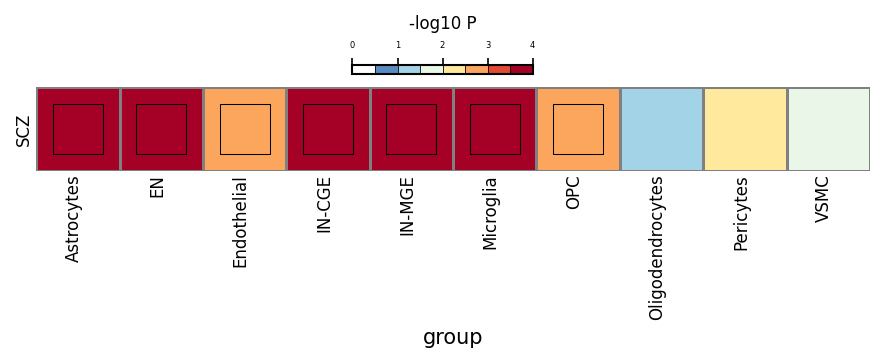

In [17]:
dict_branch2_stats = {
    'SCZ': pd.read_csv(f"~/SCZ.scv_group.celltype", sep="\t", index_col=0)
}
scv.plot_group_stats(dict_branch2_stats)

## Save all levels results

FOR RNA 

This function output GO enrichment analysis from gseapy 

anno = scv.annotate()

In [48]:
for i in [,'EN','IN-CGE']:
    scv.table_output(adata_rna,overlap_matrix,'~/data/multi_branch1.gs',anno,'RNA',i)

456 input query terms found no hit:	['105369174', '105378592', '105378594', '105376719', '102724970', '100133301', '729574', '102723383'


FOR ATAC

In [ ]:
for i in ['Astrocytes','EN','IN-CGE','IN-MGE','Microglia','OPC']:
    scv.table_output(adata_atac,overlap_matrix,'~/data/multi_branch2.gs',anno,'ATAC',i)